In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df= pd.read_csv("D:\Datasets\Titanic_train.csv")

In [88]:
df.shape

(891, 12)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\gnaya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

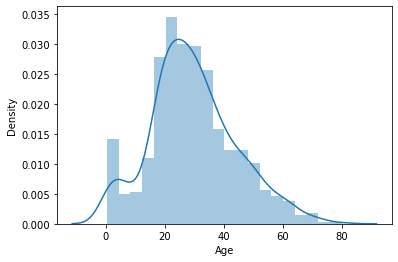

In [13]:
sns.distplot(df['Age'].dropna())

### Guassian Distribution

Text(0, 0.5, 'No of passengers')

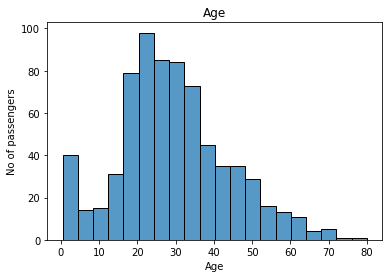

In [14]:
figure = sns.histplot(df.Age)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

C:\Users\gnaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

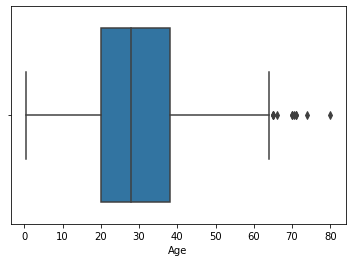

In [16]:
sns.boxplot(df.Age)

In [17]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### For Normal distribution

In [18]:
# we will find the boundaries to differentiate the outliers in Age column.
lower_boundary = df.Age.mean() - 3*df.Age.std()
upper_boundary = df.Age.mean() + 3*df.Age.std()
print(lower_boundary),print(upper_boundary),print(df.Age.mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

### If there is skewness in the distribution

Text(0, 0.5, 'No of passengers')

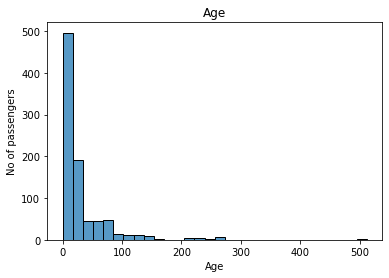

In [19]:
figure = sns.histplot(df.Fare,bins=30)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')             # here the data is rightly skewed

C:\Users\gnaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

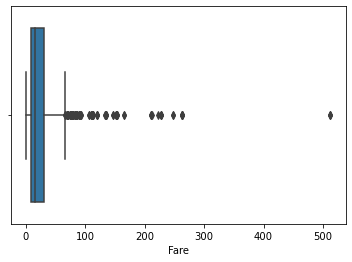

In [20]:
sns.boxplot(df.Fare)

In [21]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
# we will find the Inter Quartile Range  to define the boundaries
IQR = df.Fare.quantile(.75)-df.Fare.quantile(.25)

In [25]:
lower_boundary = df.Fare.quantile(0.25)- 1.5 *IQR
upper_boundary = df.Fare.quantile(0.75) + 1.5*IQR
print(lower_boundary),print(upper_boundary)

-26.724
65.6344


(None, None)

In [26]:
#extreme outliers
lower_boundary = df.Fare.quantile(0.25)- 3*IQR
upper_boundary = df.Fare.quantile(0.75)+ 3*IQR
print(lower_boundary), print(upper_boundary)

-61.358399999999996
100.2688


(None, None)

In [126]:
data = df.copy()

In [127]:
data.loc[data['Age'] > 73, 'Age'] = 73

In [128]:
data.loc[data['Fare'] > 100, 'Fare'] = 100

Text(0, 0.5, 'No of passengers')

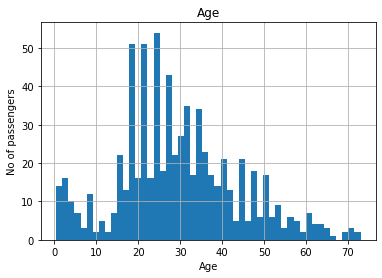

In [129]:
figure = data.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

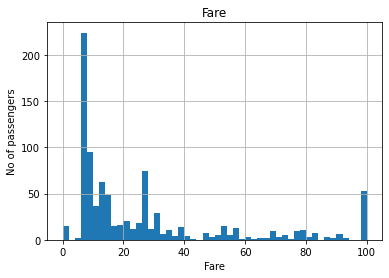

In [130]:
figure = data.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [244]:
x_train, x_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=.2)

In [245]:
# Logistic Regression
classifier = LogisticRegression()
model = classifier.fit(x_train,y_train)
ypred = model.predict(x_test)
ypred1 = model.predict_log_proba(x_test)

In [246]:
df1 = pd.DataFrame({'Predicted': ypred, 'Actual' : y_test})

In [247]:
print("accuracy score is : {}".format(accuracy_score(y_test,ypred)))
print("accuracy score is : {}".format(roc_auc_score(y_test,ypred1[:,1])))

accuracy score is : 0.664804469273743
accuracy score is : 0.7055706521739131
